### Slater Podgorny

### Project Part 3

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import StatTests 
import matplotlib.pyplot as plt 
%matplotlib inline 

#### Read in Data

In [2]:
data1 = pd.read_csv("PodgornyCSV-(1).csv")
data2 = pd.read_csv("PodgornyCSV-(2).csv")

FinalData = pd.merge(data1,data2, on = "State_Names")
FinalData.set_index('State_Names')
FinalData.head()
FinalData.head()

State_Names  State_Pop  Tourism_Expenditure  Growth_rate      NPS_Area  \
0     Alabama       4.89               9761.2         0.32     27.723766   
1      Alaska       0.74               2727.0        -0.49  82123.125830   
2     Arizona       7.17              20257.0         1.69   4153.447906   
3    Arkansas       3.01               7058.0         0.27    159.021500   
4  California      39.56             139940.0         0.13  11930.197230   

  Biome_Type  Visitor_Spending  Num_of_Parks  Num_Park_Visitors Region  
0          F              40.6             9            1001110     SE  
1         TA            1300.0            24            2788738      W  
2         GL            1100.0            22           13321857     SW  
3          F             188.0             7            3672027     SE  
4          D            1900.0            28           40636133      W

#### Problem Statement

##### The overall goal of this project and the research questions below is to determine the effect of National and State parks on state economies. In order to conduct this analysis I relied on independent variables such as Number of Parks, Number of Park visitors, and total park area, among others. These variables were then used to help predict the dependent variable which was Visitor spending. The visitor spending variable describes how much money tourists contribute to a state's economy annually which can be a significant factor in determining the success of a state economy. The results of this analysis could lead to reevaluating the funding dedicated to state and national parks as well as a realization regarding the importance of parks not only environmentally and socially, but also financially. 

#### Research Question One: Do states with more parks than the national average have more visitor spending?

##### Analysis

<ipython-input-3-95f6bb38e757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lavg['Average_Comparison'] = 'Fewer than Average'
<ipython-input-3-95f6bb38e757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gavg['Average_Comparison'] = 'Greater than Average'


The groups are Fewer than Average and Greater than Average

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 15.836 and the p-value is 0.0001
Conclusion: Reject Ho: The variances are not equal

This is a Welch (unequal variances) Two-Sample t test of equal means with Ho: The group means are equal
The t test statistic is -4.407 and the p-value is 0.0002
Conclusion: Reject Ho: The means are not equal


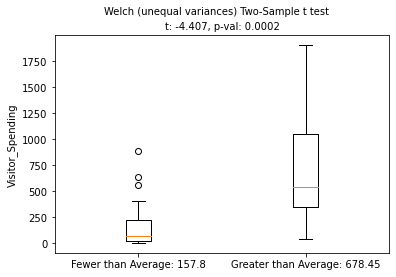

In [3]:
lavg = FinalData.loc[FinalData['Num_of_Parks'] <FinalData['Num_of_Parks'].mean()]
lavg['Average_Comparison'] = 'Fewer than Average'
gavg = FinalData.loc[FinalData['Num_of_Parks'] >=FinalData['Num_of_Parks'].mean()]
gavg['Average_Comparison'] = 'Greater than Average'
NewData =pd.concat([lavg, gavg])
NewData = NewData.reset_index(drop= True)
StatTests.MeansTest(NewData, 'Average_Comparison', 'Visitor_Spending')

##### Conclusion 

##### The t-test above returned a p-value that is less than alpha which allows us to reject the null hypothesis and state that there is a difference between the mean Visitor spending for states with more national parks than average and states with fewer national parks than average. The results of this analysis prove that national parks can help generate tourism revenue and strengthen state economies. The means show that states with more parks than average generate over four times the visitor spending of states with fewer parks than average. I think this statistic alone should greatly encourage states to invest in state and national parks. 

#### Research Question 2: Is the visitor spending different by region?

##### Analysis 

The groups are SE and W and SW and NE and MW
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 3.533 and the p-value is 0.0137
Conclusion: Reject Ho: At least one group mean is different


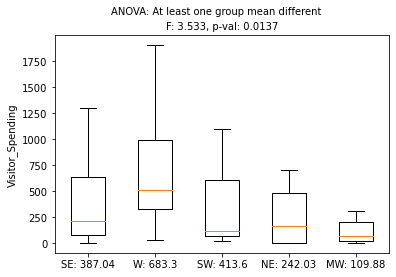

Ho: The group means are equal
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
    MW     NE 132.1487    0.9 -343.5511  607.8485  False
    MW     SE 277.1511 0.3516  -145.382  699.6842  False
    MW     SW 303.7154 0.7104 -398.9398 1006.3706  False
    MW      W 573.4154 0.0063  123.9956 1022.8352   True
    NE     SE 145.0024    0.9 -323.6958  613.7005  False
    NE     SW 171.5667    0.9 -559.7801  902.9134  False
    NE      W 441.2667 0.0991  -51.8072  934.3405  False
    SE     SW  26.5643    0.9 -671.3698  724.4983  False
    SE      W 296.2643 0.3297 -145.7377  738.2663  False
    SW      W    269.7 0.7967 -444.8319  984.2319  False
--------------------------------------------------------


/Users/slaterpodgorny/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


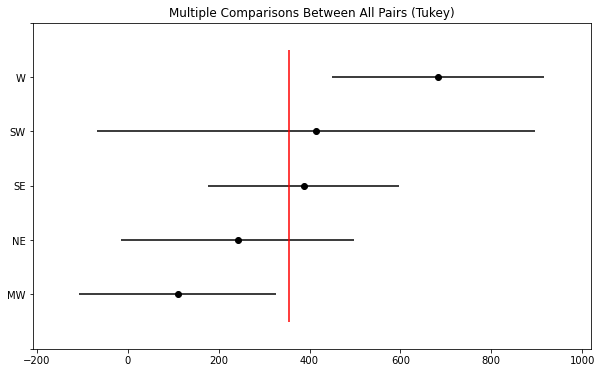

In [4]:
StatTests.MeansTest(FinalData, 'Region', 'Visitor_Spending')

##### Conclusion

##### The results of this analysis show that, for the most part, the average visitor spending is not different across most regions. The two regions that showed differences in visitor spending were the west and the midwest. This is significant in that it proves that one region is not necessarily predisposed to generating greater tourism revenue simply because of location. This should prove to states in all regions that dedicating resources to the parks system can help generate tourism revenue regardless of location. 

#### Research Question 3: Can number of park visitors help predict visitor spending?

##### Analysis

                            OLS Regression Results                            
Dep. Variable:       Visitor_Spending   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.59e-14
Time:                        18:24:54   Log-Likelihood:                -341.93
No. Observations:                  50   AIC:                             687.9
Df Residuals:                      48   BIC:                             691.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            79.6564     41.32

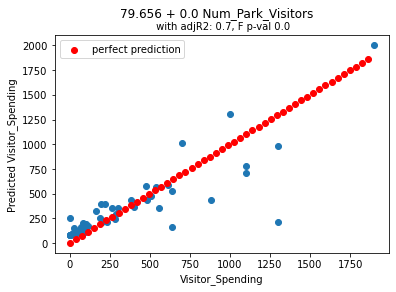

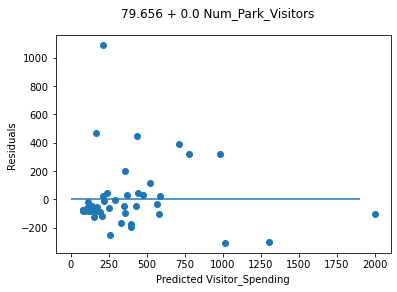

In [5]:
NewModel = ols("Visitor_Spending ~ Num_Park_Visitors", data =FinalData).fit()
print(NewModel.summary())
ydata2=FinalData['Visitor_Spending']
StatTests.mult_reg(NewModel, ydata2)

##### Conclusion

##### The results of this analysis are very significant in proving the impact of national and state parks on tourism revenue. The p-value is notably lower than the alpha value which allows us to reject the null hypothesis and state that the Number of Park visitors can help predcit a state's tourism revenue. The analysis shows that over 70% of the time, Number of park visitors helps predict visitor spending. The results should encourage states to dedicate resources to parks in order to attract more visitors and thus increase visitor spending. 

#### Overall Conclusion

##### It is unfortunate that, in most cases, investment in the environment requires some degree of a financial incentive. In the case of National and State Parks, the environmental benefits of dedicating resources to the protection of wild spaces is clear but the financial incentive may be lacking. The results of this project should display that the environmental benefits of National Parks are accompanied by significant, long-term, financial benefits as well. Through this analysis, the relationship between visitor spending and the number of parks, number of park visitors, and amount of park area becomes clear; the health and prevalance of a state's park system greatly impacts the amount of tourism revenue the state is able to cultivate. 

#### Menu 


Menu
1. Generate Descriptive Statistics
2. Research Question 1: Do states with more parks than the national average have more visitor spending?
3. Research Question 2: Is the average number of park visitors different by region?
4. Research Quesiton 3: Can number of park visitors help predict visitor spending?
5. Regression Model
6. Display Graphs
7. ANOVA: Is the average NPS Area different by Biome Type?
8. Output to Excel
9. Quit Menu


Please input a number: 6



 Your choice: 6. Display graphs
State_Names             object
State_Pop              float64
Tourism_Expenditure    float64
Growth_rate            float64
NPS_Area               float64
Biome_Type              object
Visitor_Spending       float64
Num_of_Parks             int64
Num_Park_Visitors        int64
Region                  object
dtype: object



 Select a numeric variable: NPS_Area
Select a categorical variable: Biome_Type


You selected NPS_Area and Biome_Type


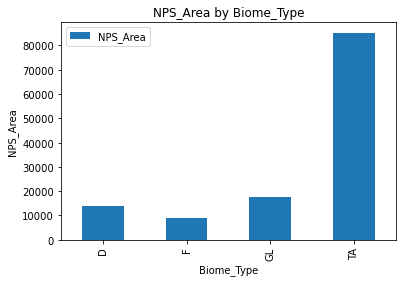


Menu
1. Generate Descriptive Statistics
2. Research Question 1: Do states with more parks than the national average have more visitor spending?
3. Research Question 2: Is the average number of park visitors different by region?
4. Research Quesiton 3: Can number of park visitors help predict visitor spending?
5. Regression Model
6. Display Graphs
7. ANOVA: Is the average NPS Area different by Biome Type?
8. Output to Excel
9. Quit Menu


Please input a number: 2



 Your choice: 2. Research Question 1: Do states with more parks than the national average have more visitor spending?
The groups are Fewer than Average and Greater than Average

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 15.836 and the p-value is 0.0001
Conclusion: Reject Ho: The variances are not equal

This is a Welch (unequal variances) Two-Sample t test of equal means with Ho: The group means are equal
The t test statistic is -4.407 and the p-value is 0.0002
Conclusion: Reject Ho: The means are not equal


<ipython-input-7-6728dc2c739a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lavg['Average_Comparison'] = 'Fewer than Average'
<ipython-input-7-6728dc2c739a>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gavg['Average_Comparison'] = 'Greater than Average'


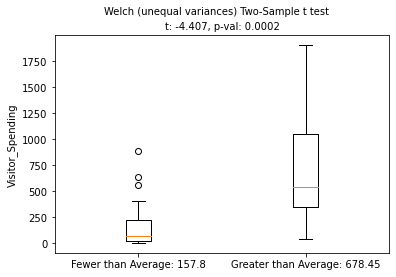

CONCLUSION: The p-value of .002 allows us to reject the null hypothesis and state that the mean visitor spending is 
 different for states with more parks than the national average and states with fewer parks than the national 
 average. For a more detailed conclusion see the Research Question 1 - Conclusion section below.

Menu
1. Generate Descriptive Statistics
2. Research Question 1: Do states with more parks than the national average have more visitor spending?
3. Research Question 2: Is the average number of park visitors different by region?
4. Research Quesiton 3: Can number of park visitors help predict visitor spending?
5. Regression Model
6. Display Graphs
7. ANOVA: Is the average NPS Area different by Biome Type?
8. Output to Excel
9. Quit Menu


Please input a number: 1



 Your choice: 1. Generate Descriptive Statistics
1.Categorical Variables
2. Numeric Variables


Would you like to generate descriptive statistics for numeric or catergorical variables? 2


Your choice: 2. Numeric variables
State_Pop: count    50.000000
mean      6.529400
std       7.371813
min       0.580000
25%       1.840000
50%       4.565000
75%       7.447500
max      39.560000
Name: State_Pop, dtype: float64
Tourism_Expenditure: count        50.000000
mean      20285.384000
std       25999.408768
min        2160.000000
25%        5472.500000
50%       12076.000000
75%       22725.250000
max      139940.000000
Name: Tourism_Expenditure, dtype: float64
Growth_rate: count    50.000000
mean      0.455000
std       0.621566
min      -0.670000
25%       0.077500
50%       0.295000
75%       0.857500
max       2.090000
Name: Growth_rate, dtype: float64
NPS_Area: count       50.000000
mean      2509.207696
std      11649.694280
min          0.007125
25%         33.276645
50%        131.100414
75%        784.587859
max      82123.125830
Name: NPS_Area, dtype: float64
Visitor_Spending: count      50.000000
mean      355.648000
std       424.096085
min         1.800000
25%   

Please input a number: 9


In [7]:
def runMenu(df):
    quit = False
    while quit == False:
        print("\nMenu")
        print("1. Generate Descriptive Statistics")
        print("2. Research Question 1: Do states with more parks than the national average have more visitor spending?")
        print("3. Research Question 2: Is the average number of park visitors different by region?")
        print("4. Research Quesiton 3: Can number of park visitors help predict visitor spending?")
        print("5. Regression Model")
        print("6. Display Graphs")
        print("7. ANOVA: Is the average NPS Area different by Biome Type?")
        print("8. Output to Excel")
        print("9. Quit Menu")
        menu_choice = input("Please input a number:")
        try:
            menu_choice = int(menu_choice)
        except: 
            print("Error: Please enter a number between 1 and 9")
            continue 
        if menu_choice not in (1,2,3,4,5,6,7,8,9): 
            print("Error: Please enter a number between 1 and 9")
        else: 
            if menu_choice == 1:
                print("\n Your choice: 1. Generate Descriptive Statistics")
                print("1.Categorical Variables")
                print("2. Numeric Variables")
                q1_choice = input("Would you like to generate descriptive statistics for numeric or catergorical variables?")
                try:
                    q1_choice = int(q1_choice)
                except: 
                    print("Error: Please enter 1 or 2 for this option")
                    continue 
                if q1_choice not in (1,2):
                    print("Error: Please enter 1 or 2 for this option")
                else: 
                    if q1_choice == 1:
                        print("Your choice: 1. Categorical Variables")
                        for c  in FinalData.select_dtypes('object').columns: 
                            print(f"{c}: {FinalData[c].describe()}")
                    if q1_choice ==2: 
                        print("Your choice: 2. Numeric variables")
                        for c  in FinalData.select_dtypes('number').columns: 
                            print(f"{c}: {FinalData[c].describe()}")
            if menu_choice == 2:
                #t-test
                print("\n Your choice: 2. Research Question 1: Do states with more parks than the national average have more visitor spending?")
                lavg = FinalData.loc[FinalData['Num_of_Parks'] <FinalData['Num_of_Parks'].mean()]
                lavg['Average_Comparison'] = 'Fewer than Average'
                gavg = FinalData.loc[FinalData['Num_of_Parks'] >=FinalData['Num_of_Parks'].mean()]
                gavg['Average_Comparison'] = 'Greater than Average'
                NewData =pd.concat([lavg, gavg])
                NewData = NewData.reset_index(drop= True)
                StatTests.MeansTest(NewData, 'Average_Comparison', 'Visitor_Spending')
                print("CONCLUSION: The p-value of .002 allows us to reject the null hypothesis and state that the mean visitor spending is \n different for states with more parks than the national average and states with fewer parks than the national \n average. For a more detailed conclusion see the Research Question 1 - Conclusion section below.")
            if menu_choice == 3:
                #ANOVA
                print("\n Your choice: 3. Research Question 2: Is the average number of park visitors different by region?")
                StatTests.MeansTest(FinalData, 'Region', 'Num_Park_Visitors')
                
            if menu_choice ==4: 
                print("\n Your choice: 4. Research Quesiton 3: Can number of park visitors help predict visitor spending?")
                NewModel = ols("Visitor_Spending ~ Num_Park_Visitors", data =FinalData).fit()
                print(NewModel.summary())
                ydata2=FinalData['Visitor_Spending']
                StatTests.mult_reg(NewModel, ydata2)
            if menu_choice == 5:
                #reg
                print("\n Your choice: 5. Regression Model")
                print(FinalData.dtypes)
                print("\nPlease select variables with numeric variable types")
                var1 = input("Select a dependent variable:")
                var2 = input("Select an independent variable:")
                Models = ols("FinalData[var1] ~ FinalData[var2]", data =FinalData).fit()
                print(Models.summary())
                ydata2=FinalData[var1]
                StatTests.mult_reg(Models, ydata2)
            if menu_choice ==6:
                print("\n Your choice: 6. Display graphs")
                print(FinalData.dtypes)
                cvar1 = input("\n Select a numeric variable:")
                cvar2 = input("Select a categorical variable:")
                print(f"You selected {cvar1} and {cvar2}")
                tabNew = FinalData.pivot_table([cvar1], index=[cvar2], aggfunc=np.sum)
                tabNew.plot.bar()
                plt.title(f'{cvar1} by {cvar2}')
                plt.ylabel(cvar1)
                plt.show()
            if menu_choice==7: 
                print("\n Your choice: 7. Is the average NPS Area different by Biome Type?")
                StatTests.MeansTest(FinalData, 'Biome_Type', 'NPS_Area')
            if menu_choice ==8: 
                print("\n Your choice: 8. Output to Excel")
                print("1. Data1: Includes variables State Population, Tourism Expenditure, Growth Rate, NPS Area, and Biome Type")
                print("2. Data2: Includes variables Visitor Spending, Number of Parks, Number of Park visitors, and Region")
                print("3. Choose 5 columns")
                print("4. FinalData: Includes all variables ")
                q8_choice = input("Which DataFrame would you like to output to excel?")
                try:
                    q8_choice = int(q8_choice)
                except: 
                    print("Error: Please enter 1, 2, 3, or 4 for this option")
                    continue 
                if q8_choice not in (1,2,3):
                    print("Error: Please enter 1, 2, 3, or 4 for this option")
                else: 
                    if q8_choice == 1:
                        print("Your choice: Data1")
                        print("Your choice: Data2")
                        print("Your choice: FinalData")
                        data1.to_excel('NationalParks_DataFrame1.xlsx', index = False)
                        print("An Excel file entitled NationalParks_DataFrame1.xlsx has been created")
                    if q8_choice ==2: 
                        data2.to_excel('NationalParks_DataFrame2.xlsx', index = False)
                        print("An Excel file entitled NationalParks_DataFrame2.xlsx has been created")
                    if q8_choice==3: 
                        print(FinalData.columns)
                        print("Select 5 columns, State Names will be included automatically")
                        c1 = input("Select column 1:")
                        c2 = input("Select column 2:")
                        c3 = input("Select column 3:")
                        c4 = input("Select column 4:")
                        c5 = input("Select column 5:")
                        FinalData[['State_Names', c1, c2, c3, c4, c5]].to_excel('NationalParks_FiveCols.xlsx', index = False)
                        print("An Excel file entitled NationalParks_FiveCols.xlsx has been created")
                    if q8_choice ==4: 
                        FinalData.to_excel('NationalParks_FinalData.xlsx', index = False)
                        print("An Excel file entitled NationalParks_FinalData.xlsx has been created")
               
            if menu_choice == 9: 
                quit = True
                        
                    
runMenu(FinalData)      